Test Set Results:
Accuracy:  0.9880
Precision: 0.9866
Recall:    0.9915
F1-score:  0.9891
ROC AUC:   0.9987


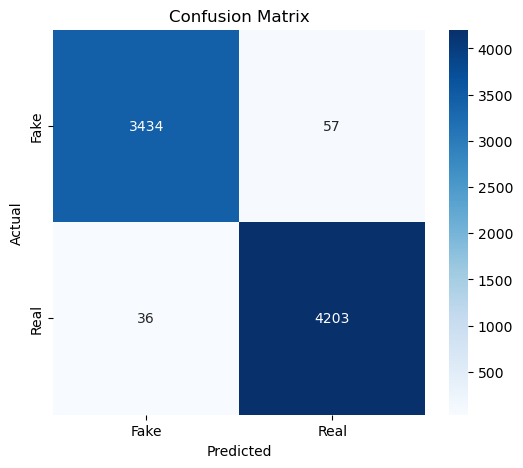

In [8]:
import pandas as pd
import re  # Importando o módulo 're' para expressões regulares
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:

# 1) Carregar os dados
fake_path = "Data/Fake.csv"
true_path = "Data/True.csv"

df_fake = pd.read_csv(fake_path)
df_true = pd.read_csv(true_path)

df_fake['label'] = 0  # Fake news
df_true['label'] = 1  # Real news

In [ ]:
# 2) Limpeza de dados (remoção de colunas não necessárias)
df_fake.drop(columns=["title", "date", "subject"], inplace=True, errors='ignore')
df_true.drop(columns=["title", "date", "subject"], inplace=True, errors='ignore')

In [ ]:
# 3) Limpeza adicional (exemplo de remover prefixos como "WASHINGTON (Reuters) -")
def limpar_prefixo_agencia(texto):
    return re.sub(r"^(.*?\(Reuters\)[\s\-–]*)", "", texto)

df_true['text'] = df_true['text'].apply(limpar_prefixo_agencia)

In [ ]:
# 4) Juntar os dados e embaralhar
df = pd.concat([df_fake, df_true], ignore_index=True)
df = df.drop_duplicates(subset='text').reset_index(drop=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# 5) Divisão em treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

In [ ]:
# 6) Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=20000, max_df=0.75, min_df=2, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# 7) Treinar o modelo SVM
svm_model = SVC(kernel='linear', class_weight="balanced", random_state=42)
svm_model.fit(X_train_vec, y_train)

In [ ]:
# 8) Fazer previsões
y_pred = svm_model.predict(X_test_vec)
y_prob = svm_model.decision_function(X_test_vec)

In [ ]:
# 9) Avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Exibir as métricas
print("Test Set Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

In [ ]:
# 10) Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()